In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.cm as cm
import matplotlib.patches as patches
from matplotlib.ticker import AutoMinorLocator
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredEllipse
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from astropy.io import fits
from astropy import wcs
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.coordinates import Angle
import aplpy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/Users/atetarenko/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
datadir = '/Users/atetarenko/Dropbox/'
fits_file1=datadir+'Liller1_may142018_X_both_clean1.image.tt0_clean.fits'
cells=0.05#arcsec
#center and radius for aplpy version
coord_radio=SkyCoord(ra='17h33m24.54s',dec='-33d23m21.7s',frame='icrs')
wid=Angle(5*u.arcsec)
#rms noise in Jy
rmsnoise=5e-6
#contour levels
n=np.array([3.3,3.7])
ns=2.**(n/2.)
levels=ns*rmsnoise
#max and min brightness, and power law exponent scale (1. is none)
vmin=0
vmax=30e-6
gm=1.5

In [3]:
hdulist1 = fits.open(fits_file1)[0]
data1=hdulist1.data
wmap1=wcs.WCS(hdulist1.header)
b_major=Angle(hdulist1.header['BMAJ']*u.degree).arcsec/cells
b_minor=Angle(hdulist1.header['BMIN']*u.degree).arcsec/cells
b_pa=90.+hdulist1.header['BPA']
print Angle(hdulist1.header['BMAJ']*u.degree).arcsec,Angle(hdulist1.header['BMIN']*u.degree).arcsec,hdulist1.header['BPA']

1.04384338856 0.212256416678 -30.6457519531


In [4]:
#X-ray error circles
coord_swift=SkyCoord(ra='17h33m24.54s',dec='-33d23m21.7s',frame='icrs')
radsw=2.3
xsw=float(wmap1.wcs_world2pix(coord_swift.ra.value,coord_swift.dec.value,0,0,1)[0])
ysw=float(wmap1.wcs_world2pix(coord_swift.ra.value,coord_swift.dec.value,0,0,1)[1])

coord_rb=SkyCoord(ra='17h33m24.61s',dec='-33d23m19.8s',frame='icrs')
radrb=0.1
xrb=float(wmap1.wcs_world2pix(coord_rb.ra.value,coord_rb.dec.value,0,0,1)[0])
yrb=float(wmap1.wcs_world2pix(coord_rb.ra.value,coord_rb.dec.value,0,0,1)[1])

coord_ch=SkyCoord(ra='17h33m24.60s',dec='-33d23m21.5s',frame='icrs')
radch=0.1
xch=float(wmap1.wcs_world2pix(coord_ch.ra.value,coord_ch.dec.value,0,0,1)[0])
ych=float(wmap1.wcs_world2pix(coord_ch.ra.value,coord_ch.dec.value,0,0,1)[1])



In [8]:
#make scaled version
fh = fits.open(fits_file1)
data = fh[0].data
header = fh[0].header
#mywcs = wcs.WCS(header)
#new_header = mywcs.to_header()
new_fh = fits.PrimaryHDU(data=data*1e6, header=header)
new_fh.writeto(fits_file1.strip('.fits')+'_scaledujy5.fits')
fits_file_sc=fits_file1.strip('.fits')+'_scaledujy5.fits'

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


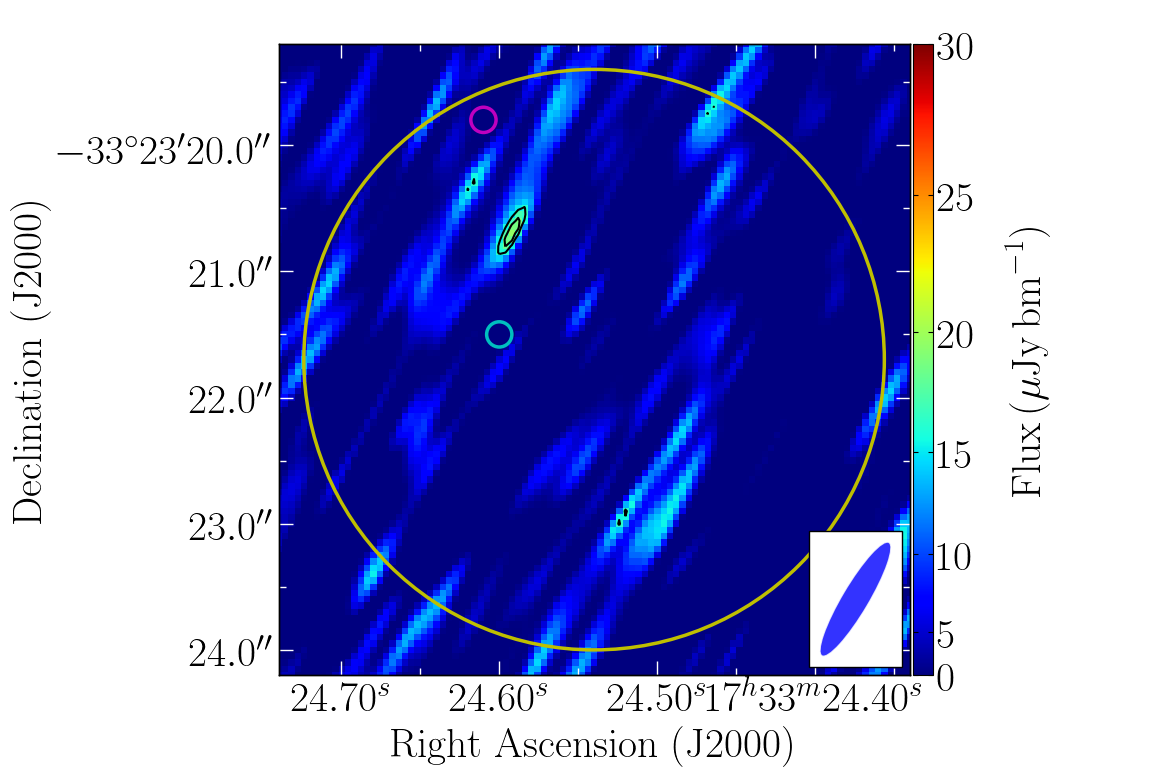

In [23]:
plt.rcdefaults()
fits_file_sc=fits_file1.strip('.fits')+'_scaledujy5.fits'
plt.rc('xtick', color='k')
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

fig=plt.figure(figsize=(10,7))
img = aplpy.FITSFigure(fits_file_sc,figure=fig, subplot=[0.0,0.0,1.0,1.0])
img.show_colorscale(cmap=cm.get_cmap('jet', 500),vmin=vmin*1e6,vmax=vmax*1e6,stretch='power',exponent=gm)
img.show_contour(fits_file_sc,dimensions=[0,1],slices=[0,0],levels=levels*1e6,colors='black',linestyles='-')
img.tick_labels.set_font(size=30, weight='medium', \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')
img.add_colorbar()
img.colorbar.set_location('right')
img.colorbar.set_axis_label_text('${\\rm Flux}\,(\\mu{\\rm Jy\,bm}^{-1})$')
img.colorbar.set_axis_label_font(size=30)
img.colorbar.set_width(0.2)
img.colorbar.set_pad(0.03)
img.colorbar.set_font(size=30, weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')
img.colorbar.set_axis_label_pad(20)
#img.colorbar.show()
img.show_circles(coord_ch.ra.deg, coord_ch.dec.deg, Angle(radch*u.arcsec).deg,color='c',linewidth=2.5)
img.show_circles(coord_swift.ra.deg, coord_swift.dec.deg, Angle(radsw*u.arcsec).deg,color='y',linewidth=2.5)
img.show_circles(coord_rb.ra.deg, coord_rb.dec.deg, Angle(radrb*u.arcsec).deg,color='m',linewidth=2.5)
img.add_beam()
img.beam.set_major((b_major*cells) * u.arcsecond)
img.beam.set_minor((b_minor*cells) * u.arcsecond)
img.beam.set_angle((b_pa-90.) * u.degree)
img.beam.set_corner('bottom right')
img.beam.set_frame(True)
img.beam.set_alpha(0.8)
img.beam.set_color('white')
img.beam.set_edgecolor('white')
img.beam.set_facecolor('blue')
img.axis_labels.set_xtext('Right Ascension (J2000)')
img.axis_labels.set_ytext('Declination (J2000)')
img.axis_labels.set_font(size=30, weight='bold', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')
img.ticks.set_color('white')
img.ticks.show_x()
img.ticks.show_y()
img.ticks.set_length(10)
img.ticks.set_linewidth(1)
img.ticks.set_minor_frequency(2)
img.recenter(coord_radio.ra.deg,coord_radio.dec.deg,width=wid.deg,height=wid.deg)
img.set_auto_refresh(True)
#img.set_theme('publication')
img.save(datadir+'radio_image_liller1_2.png',adjust_bbox=True)
#img.showfig()

In [9]:
#extent of image you want for wcs axis version. coord0 lower left, coord1 upper right
coord0=SkyCoord('17h33m24.792s','-33d23m23.865s',frame='icrs')
coord1=SkyCoord('17h33m24.412s','-33d23m19.137s',frame='icrs')
x1=float(wmap1.wcs_world2pix(coord0.ra.value,coord0.dec.value,0,0,1)[0])
y1=float(wmap1.wcs_world2pix(coord0.ra.value,coord0.dec.value,0,0,1)[1])
x2=float(wmap1.wcs_world2pix(coord1.ra.value,coord1.dec.value,0,0,1)[0])
y2=float(wmap1.wcs_world2pix(coord1.ra.value,coord1.dec.value,0,0,1)[1])

In [12]:
#make contour version
fh = fits.open(fits_file1)
data = fh[0].data.squeeze() # drops the size-1 axes
header = fh[0].header
mywcs = wcs.WCS(header)
new_header = mywcs.to_header()
new_fh = fits.PrimaryHDU(data=data, header=new_header)
new_fh.writeto(fits_file1.strip('.fits')+'_contours2.fits')
fits_file_c=fits_file1.strip('.fits')+'_contours2.fits'

In [10]:
fits_file_c=fits_file1.strip('.fits')+'_contours2.fits'
hdulist_c = fits.open(fits_file_c)[0]
data_c=hdulist_c.data
wmap_c=wcs.WCS(hdulist_c.header)
hdulist_c.header.remove('CRPIX3')
hdulist_c.header.remove('CRVAL3')
hdulist_c.header.remove('CDELT3')
hdulist_c.header.remove('CUNIT3')
hdulist_c.header.remove('CTYPE3')
hdulist_c.header.remove('CRPIX4')
hdulist_c.header.remove('CRVAL4')
hdulist_c.header.remove('CDELT4')
#hdulist_c.header.remove('CUNIT4')
hdulist_c.header.remove('CTYPE4')
hdulist_c.header['WCSAXES']=2
x=np.arange(0,len(data_c[0,:]))
y=np.arange(0,len(data_c[:,0]))
X, Y = np.meshgrid(x, y)
Z=data_c

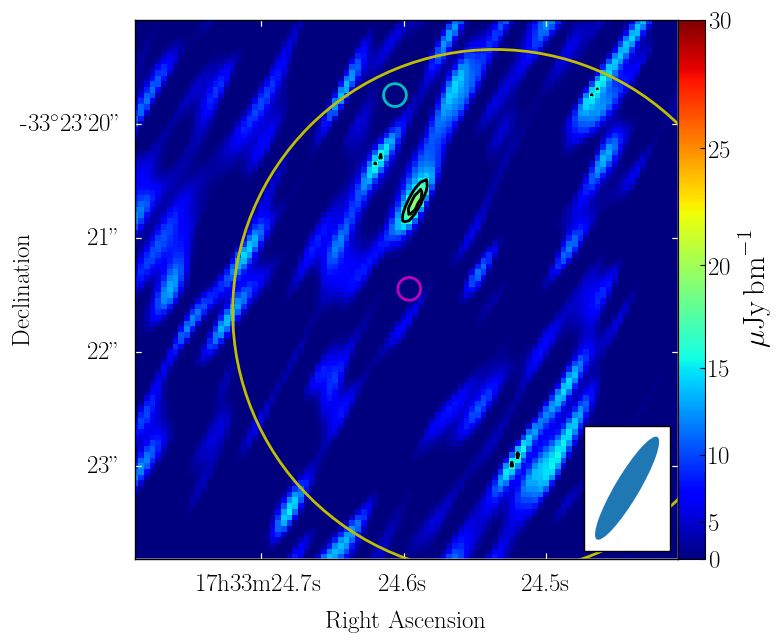

In [11]:
fig=plt.figure(figsize=(9,7))
plt.rcdefaults()
plt.rc('xtick.major', size=4)
plt.rc('xtick', color='w', labelsize='large')
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

ax1 = fig.add_subplot(111, projection=wmap1.celestial)
im=plt.imshow(np.nan_to_num(data1[0,0,:,:])*1e6,origin="lower",\
cmap=cm.get_cmap('jet', 500),norm=colors.PowerNorm(gamma=gm),vmin=vmin*1e6,vmax=vmax*1e6)
cbar=plt.colorbar(im, orientation='vertical',fraction=0.04,pad=0)
cbar.set_label('$\\mu{\\rm Jy\, bm}^{-1}$',size=22)
ax1.tick_params(axis='both', which='major', labelsize=18,width=5,length=7,color='w')
ax1.tick_params(axis='both', which='minor', labelsize=18,width=5,length=7,color='w')
ax1.coords['ra'].set_axislabel('Right Ascension',size=18)
ax1.coords['dec'].set_axislabel('Declination',minpad=-0.1,size=18)
ax1.coords['ra'].set_major_formatter('hh:mm:ss.s')
ax1.set_ylim(y1,y2)
ax1.set_xlim(x1,x2)
ae = AnchoredEllipse(ax1.transData, width=b_major, height=b_minor, angle=b_pa,\
                     loc=4, pad=0.5, borderpad=0.4, frameon=True)
ax1.add_artist(ae)
c1 = patches.Ellipse((xsw,ysw), 2.*radsw/cells,2.*radsw/cells,angle=0., linewidth=2, fill=False,color='y',zorder=5)
c2 = patches.Ellipse((xch,ych), 2.*radch/cells,2.*radch/cells,angle=0., linewidth=2, fill=False,color='m',zorder=5)
c3 = patches.Ellipse((xrb,yrb), 2.*radrb/cells,2.*radrb/cells,angle=0., linewidth=2, fill=False,color='c',zorder=5)
ax1.add_patch(c2)
ax1.add_patch(c1)
ax1.add_patch(c3)
plt.contour(X,Y,Z,levels,colors='k',linewidths=2,zorder=1)
ax1.coords['ra'].set_ticklabel(size=18)
#ax1.xticks.set_ticksize(3)
ax1.coords['dec'].set_ticklabel(size=18)
cbar.ax.tick_params(labelsize=18)
ax1.tick_params(axis='both', which='both', direction='in')
#plt.savefig(datadir+'radio_image_wcsaxes.pdf,bbox_inches='tight')

In [15]:
coord_swift=SkyCoord(ra='17h33m24.54s',dec='-33d23m21.7s',frame='icrs')


coord_transient=SkyCoord(ra='17h33m24.5931s',dec='-33d23m20.6522s',frame='icrs')

sep = coord_swift.separation(coord_transient).arcsec
print sep
sep = coord_rb.separation(coord_transient).arcsec
print sep
sep = coord_ch.separation(coord_transient).arcsec
print sep

1.24103243233
0.878091766476
0.852192950536
